# Task 5
To complete this task we first must implement the function xor_net($x_{1}, x_{2}, weights)$. This simulates a network with two inputs, two hidden nodes and one output.  Weights must be a vector holding 9 tunable parameters. Each non input nodea has 3 connections: two are the inputs and one is the bias. Non- input nodes use the sigmoid activation function. 

The second task is to implement an error function mse(weights, which returns the mean square error made by your network on 4 possible input vectors, (0,0) (0,1) (1,0) and (1,1) and the target values 0,1,1,0.

The thrid task is to implment a gradient of the mse(weights) function called the grdmse(weights). It should return a vector of partial derivatives of the mse function over each element of the weights function.

The final tast is to implement the gradient descent algorithm:
a) Intialize the weights to random weights 
b) Iterate weights = weights - n * grdmse(weights), where n is a small positive constant (learning rate)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
from matplotlib import rc
rc('text', usetex=True)
plt.ioff()
from sklearn.metrics.pairwise import pairwise_distances as pairdist
import scipy.spatial.distance

In [3]:
def xor_net(x, w, func):
    """
    Input:
        x - [x1, x2] input
        w - [w0, .., w8] weights
        func - activation function
    This function calculates output of xor-function
    Outputs:
        out - predicted output of xor function (scalar)
    """
    x = np.insert(x, 0, 1.)
    h = np.dot(w[:6].reshape(2,3), x)
    h = func(h)
    out = np.dot(w[6:], np.insert(h, 0, 1.))
    return func(out)

In [4]:
def mse(weights, func):
    """
    Inputs:
        wights - [w0, .., w8] weights
        func -  the function
    This fucntion returns the mse on the inputs and possible outcomes
    
    Outputs:
        mse - mean squared error over all outputs
    """
    
    mse = 0.0 
    outputs = np.array([0., 1., 1., 0.])
    inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
    
    for i in range(len(outputs)):
        
        temp = (xor_net(inputs[i], weights, func) - outputs[i]) ** 2.
        mse += temp
        
    return mse/len(outputs)

In [5]:
def grdmse(weights, func):
    """
    Inputs:
        weights - 
        func - Activation function
        
    This function calcaulates the partial derivatives of the mse vector over each element of the
    weight vector.
    
    Outputs:
        arr- the array of partial derivatives of the mse vector
    """
    arr = np.zeros(len(weights))
    
    weight_temp = np.array([[j+1e-3 if j==weights[i] else j for j in weights] for i in range(len(weights))])
    
    for i in range(len(weights)):
        difference = (mse(weight_temp[i], func) - mse(weights, func))/ 1e-3
        arr[i] = difference
    return arr

In [6]:
def step_function(x):
    """
    Inputs:
        x - predicted value
    This function implements the step function
    
    """
    if x >.5:
        x = 1.
    if x <=.5:
        x = 0.
    return x

In [7]:
def Accuracy(fit, data_out):
    """
    This function calculate percentage of correctly classified digits
    Input:
        fit - predicted value for each image (vector)
        data_out - desired value for each image (vector)
    Returns:
        The percentage of correctly classified digits
    """
    return len(np.where(fit == data_out)[0])/len(data_out)*100.

In [21]:
def implement_grd_descent(func, w, step):
    
    """
    Inputs:
        step- step size 
        w- [w0, ..., w8] weights
        func- Activation function
    This function implements the gradient descent and the step function
    Outputs:
        mse_list - list of mse values
        acc -  accuracy of the algorithm
    
    """
    y = []
    t = 0
    inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
    outputs = np.array([0., 1., 1., 0.])
    
    for i in range(len(inputs)):
        y_temp = xor_net(inputs[i], w, func)
       
        #Implments the step function per the task this will allow us to monitor the mse values
        y.append(step_function(y_temp))
   
   
    mse_list= [mse(w, func)]
    accuracy_list = [Accuracy(y, outputs)]
    
    #Runs the gradient descent until convergence or for 5000 iteration
    while not (np.array_equal(outputs, y) or t == 5000):
        w -= step * grdmse(w, func)
        y = [step_function(xor_net(inputs[i], w, func)) for i in range(len(inputs))]
        mse_list.append(mse(w, func))
        accuracy_list.append(Accuracy(y, outputs))
        t += 1
        
        if t%10 == 0:
            print(t)
            print("Accuracy: {}".format(Accuracy(y, outputs)))
            
    print("Done with Training")
    return mse_list, accuracy_list

After completing the implementation we train the network on the XOR data we run thr program several times with various intitalization parameters and experiment with different activation function like hyperbolic tangent, and a linear rectifier

The next several functions are different activation functions.

In [17]:
def tanh(x):
    """
    This function returns the hyperbolic tangent function
    """
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [18]:
def sigmoid(x):
    """
    This function returns the sigmoid function
    """
    return 1./(1.+ np.exp(-x))

In [19]:
def linear_rectifer(x):
    """
    This function returns the linear rectifier function
    """
    if np.isscalar(x):
        if x < 0:
            x = 0
        return x
    else:
        return np.array([0 if i < 0 else i for i in x])  

## Making the Plots
The next few cells create plots of the accuracy and MSE.

10
Accuracy: 50.0
20
Accuracy: 50.0
30
Accuracy: 75.0
40
Accuracy: 75.0
50
Accuracy: 75.0
60
Accuracy: 75.0
70
Accuracy: 75.0
80
Accuracy: 75.0
90
Accuracy: 75.0
100
Accuracy: 75.0
110
Accuracy: 75.0
120
Accuracy: 75.0
130
Accuracy: 75.0
140
Accuracy: 75.0
150
Accuracy: 75.0
160
Accuracy: 75.0
170
Accuracy: 75.0
180
Accuracy: 75.0
190
Accuracy: 75.0
200
Accuracy: 75.0
210
Accuracy: 75.0
220
Accuracy: 75.0
230
Accuracy: 75.0
240
Accuracy: 75.0
250
Accuracy: 75.0
260
Accuracy: 75.0
270
Accuracy: 75.0
280
Accuracy: 75.0
290
Accuracy: 75.0
300
Accuracy: 75.0
310
Accuracy: 75.0
320
Accuracy: 75.0
330
Accuracy: 75.0
340
Accuracy: 75.0
350
Accuracy: 75.0
360
Accuracy: 75.0
370
Accuracy: 75.0
380
Accuracy: 75.0
390
Accuracy: 75.0
400
Accuracy: 75.0
410
Accuracy: 75.0
420
Accuracy: 75.0
430
Accuracy: 75.0
440
Accuracy: 75.0
450
Accuracy: 75.0
460
Accuracy: 75.0
470
Accuracy: 75.0
480
Accuracy: 75.0
490
Accuracy: 75.0
500
Accuracy: 75.0
510
Accuracy: 75.0
520
Accuracy: 75.0
530
Accuracy: 75.0
54

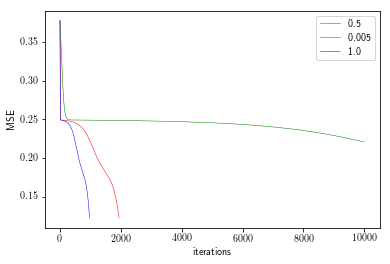

In [20]:
#This section of code creates the plots of the MSE evolution for different learning rates
np.random.seed(0)
weights = np.random.rand(9)
mse_arr_sigm_05, accuracy_sigm_05 = implement_grd_descent(sigmoid, weights, step=0.5)

np.random.seed(0)
weights = np.random.rand(9)
mse_arr_sigm_005, accuracy_sigm_005 = implement_grd_descent(sigmoid, weights, step=0.05)

np.random.seed(0)
weights = np.random.rand(9)
mse_arr_sigm_1, accuracy_sigm_1 = implement_grd_descent(sigmoid, weights, step=1.)


plt.plot(np.arange(len(mse_arr_sigm_05)), mse_arr_sigm_05, color='r', label='0.5', linewidth=.5)
plt.plot(np.arange(len(mse_arr_sigm_005)), mse_arr_sigm_005, color='green', label='0.005', linewidth=.5)
plt.plot(np.arange(len(mse_arr_sigm_1)), mse_arr_sigm_1, color='blue', label='1.0', linewidth=.5)

plt.xlabel('iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()


10
Accuracy: 50.0
20
Accuracy: 75.0
30
Accuracy: 75.0
40
Accuracy: 75.0
50
Accuracy: 75.0
60
Accuracy: 75.0
70
Accuracy: 75.0
80
Accuracy: 75.0
90
Accuracy: 75.0
100
Accuracy: 75.0
110
Accuracy: 75.0
120
Accuracy: 75.0
130
Accuracy: 75.0
140
Accuracy: 75.0
150
Accuracy: 75.0
160
Accuracy: 75.0
170
Accuracy: 75.0
180
Accuracy: 75.0
190
Accuracy: 75.0
200
Accuracy: 75.0
210
Accuracy: 75.0
220
Accuracy: 75.0
230
Accuracy: 75.0
240
Accuracy: 75.0
250
Accuracy: 75.0
260
Accuracy: 75.0
270
Accuracy: 75.0
280
Accuracy: 75.0
290
Accuracy: 75.0
300
Accuracy: 75.0
310
Accuracy: 75.0
320
Accuracy: 75.0
330
Accuracy: 75.0
340
Accuracy: 75.0
350
Accuracy: 75.0
360
Accuracy: 75.0
370
Accuracy: 75.0
380
Accuracy: 75.0
390
Accuracy: 75.0
400
Accuracy: 75.0
410
Accuracy: 75.0
420
Accuracy: 75.0
430
Accuracy: 75.0
440
Accuracy: 75.0
450
Accuracy: 75.0
460
Accuracy: 75.0
470
Accuracy: 75.0
480
Accuracy: 75.0
490
Accuracy: 75.0
500
Accuracy: 75.0
510
Accuracy: 75.0
520
Accuracy: 75.0
530
Accuracy: 75.0
54

/Users/obe-won/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


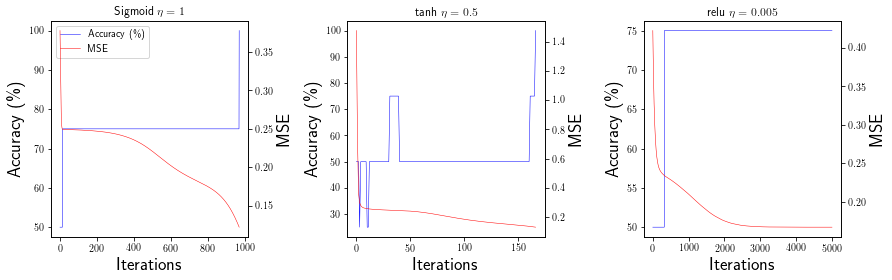

In [25]:
np.random.seed(0)
weights = np.random.rand(9)
mse_arr_sigm, accuracy_sigm = implement_grd_descent(sigmoid, weights, step=1.)  

np.random.seed(4)
weights = np.random.randn(9)
mse_arr_tanh, accuracy_tanh = implement_grd_descent(tanh, weights, step=0.5) 

np.random.seed(2)
weights = np.random.normal(loc=0., scale=0.2, size=9)
mse_arr_relu, accuracy_relu = implement_grd_descent(linear_rectifer, weights, step=.005)

fig, (ax1, ax3, ax5) = plt.subplots(1,3, figsize=(12.5,4), tight_layout=True)


ax1.set_title('Sigmoid $\eta = 1$')
ax3.set_title('tanh $\eta = 0.5$') 
ax5.set_title('relu $\eta = 0.005$')

ax2 = ax1.twinx()
ax4 = ax3.twinx()
ax6 = ax5.twinx()

lns1 = ax1.plot(np.arange(len(accuracy_sigm)), accuracy_sigm, color='blue', label='Accuracy (\%)', linewidth=.5)
lns2 = ax2.plot(np.arange(len(mse_arr_sigm)), mse_arr_sigm, color='red', label='MSE', linewidth=.5)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)


ax3.plot(np.arange(len(accuracy_tanh)), accuracy_tanh, color='blue', label='Accuracy (\%)', linewidth=.5)
ax4.plot(np.arange(len(mse_arr_tanh)), mse_arr_tanh, color='red', label='MSE', linewidth=.5)


ax5.plot(np.arange(len(accuracy_relu)), accuracy_relu, color='blue', label='Accuracy (\%)', linewidth=.5)
ax6.plot(np.arange(len(mse_arr_relu)), mse_arr_relu, color='red', label='MSE',  linewidth=.5)

ax1.set_xlabel('Iterations', fontsize = '18')
ax3.set_xlabel('Iterations', fontsize = '18')
ax5.set_xlabel('Iterations', fontsize = '18')

ax1.set_ylabel('Accuracy (\%)', fontsize = '18')
ax3.set_ylabel('Accuracy (\%)', fontsize = '18')
ax5.set_ylabel('Accuracy (\%)', fontsize = '18')

ax2.set_ylabel('MSE', fontsize = '18') 
ax4.set_ylabel('MSE', fontsize = '18') 
ax6.set_ylabel('MSE', fontsize = '18') 

fig.savefig("gradient-descent.png")
plt.show()